<a href="https://colab.research.google.com/github/amarabuco/am-pos-2020-2/blob/main/Atividade_7_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lazypredict
!pip install -U pandas

  Using cached https://files.pythonhosted.org/packages/af/f3/683bf2547a3eaeec15b39cef86f61e921b3b187f250fcd2b5c5fb4386369/pandas-1.0.5-cp37-cp37m-manylinux1_x86_64.whl
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.0.5 which is incompatible.
  Found existing installation: pandas 1.2.3
    Uninstalling pandas-1.2.3:
      Successfully uninstalled pandas-1.2.3


  Using cached https://files.pythonhosted.org/packages/f3/d4/3fe3b5bf9886912b64ef040040aec356fa48825e5a829a84c2667afdf952/pandas-1.2.3-cp37-cp37m-manylinux1_x86_64.whl
ERROR: lazypredict 0.2.9 has requirement pandas==1.0.5, but you'll have pandas 1.2.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.3 which is incompatible.
  Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5


# imports

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from lazypredict.Supervised import LazyClassifier

from sklearn.inspection import permutation_importance
from sklearn.linear_model import Ridge
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_validate, RepeatedKFold


from sklearn.decomposition import PCA, KernelPCA

import matplotlib.pyplot as plt
import seaborn as sns

<img src="https://i.pinimg.com/564x/b8/87/19/b887197560425cda6dda72a4f8a1d8ff.jpg" />

# Análise Exploratória

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00273/Example_WearableComputing_weight_lifting_exercises_biceps_curl_variations.csv', header=1)

Six young health subjects were asked to perform 5 variations of the biceps curl weight lifting exercise. One of the variations is the one predicted by the health professional.



In [ ]:
df.head()

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,kurtosis_yaw_belt,skewness_roll_belt,skewness_roll_belt.1,skewness_yaw_belt,max_roll_belt,max_picth_belt,max_yaw_belt,min_roll_belt,min_pitch_belt,min_yaw_belt,amplitude_roll_belt,amplitude_pitch_belt,amplitude_yaw_belt,var_total_accel_belt,avg_roll_belt,stddev_roll_belt,var_roll_belt,avg_pitch_belt,stddev_pitch_belt,var_pitch_belt,avg_yaw_belt,stddev_yaw_belt,var_yaw_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,kurtosis_roll_forearm,kurtosis_picth_forearm,kurtosis_yaw_forearm,skewness_roll_forearm,skewness_pitch_forearm,skewness_yaw_forearm,max_roll_forearm,max_picth_forearm,max_yaw_forearm,min_roll_forearm,min_pitch_forearm,min_yaw_forearm,amplitude_roll_forearm,amplitude_pitch_forearm,amplitude_yaw_forearm,total_accel_forearm,var_accel_forearm,avg_roll_forearm,stddev_roll_forearm,var_roll_forearm,avg_pitch_forearm,stddev_pitch_forearm,var_pitch_forearm,avg_yaw_forearm,stddev_yaw_forearm,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,eurico,1322489729,34670,28/11/2011 14:15,no,1,3.70,41.60,-82.80,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.02,0.18,0.02,-3,-18,...,277,-111.00,26.50,138.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,-0.37,-0.43,-170,155,184,-1160,1400,-876,E
1,eurico,1322489729,62641,28/11/2011 14:15,no,1,3.66,42.80,-82.50,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.96,0.14,0.05,-2,-13,...,281,-112.00,26.20,138.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.06,-0.37,-0.59,-178,164,182,-1150,1410,-871,E
2,eurico,1322489729,70653,28/11/2011 14:15,no,1,3.58,43.70,-82.30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88,0.08,0.05,-2,-6,...,275,-114.00,26.00,137.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,-0.27,-0.72,-182,172,185,-1130,1400,-863,E
3,eurico,1322489729,82654,28/11/2011 14:15,no,1,3.56,44.40,-82.10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.80,0.03,0.08,-6,-5,...,285,-115.00,25.80,137.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,-0.24,-0.79,-185,182,188,-1120,1400,-855,E
4,eurico,1322489729,90637,28/11/2011 14:15,no,1,3.57,45.10,-81.90,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.77,0.00,0.13,-4,-9,...,292,-117.00,25.50,137.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,-0.27,-0.82,-188,195,188,-1100,1400,-843,E


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Columns: 159 entries, user_name to classe
dtypes: float64(103), int64(31), object(25)
memory usage: 4.9+ MB


Alta dimensionalidade dos dados 159 colunas, com dados não numéricos e muitos dados ausentes.

In [ ]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [ ]:
y

0       E
1       E
2       E
3       E
4       E
       ..
4019    C
4020    C
4021    C
4022    C
4023    C
Name: classe, Length: 4024, dtype: object

In [ ]:
a = y.value_counts()
b = y.value_counts().sum()
a.apply(lambda x: x/b)

E   0.34
A   0.34
B   0.22
D   0.07
C   0.03
Name: classe, dtype: float64

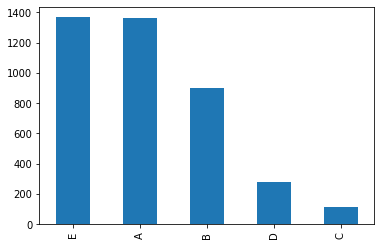

In [ ]:
pd.Series(y.value_counts()).plot.bar()

Classes desbalanceadas C (3%) e D (7%) x E (34%) e A (34%)

# Pré-processamento

1. Preencher NAN com 0
2. Eliminar erros '#DIV/0!" de planilha
3. Eliminar coluna de timestamp por redundância

In [ ]:
X.fillna(0, inplace=True)
X.replace({'#DIV/0!':0}, inplace=True)
X.drop('cvtd_timestamp', axis=1, inplace=True)
X.infer_objects()

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,kurtosis_yaw_belt,skewness_roll_belt,skewness_roll_belt.1,skewness_yaw_belt,max_roll_belt,max_picth_belt,max_yaw_belt,min_roll_belt,min_pitch_belt,min_yaw_belt,amplitude_roll_belt,amplitude_pitch_belt,amplitude_yaw_belt,var_total_accel_belt,avg_roll_belt,stddev_roll_belt,var_roll_belt,avg_pitch_belt,stddev_pitch_belt,var_pitch_belt,avg_yaw_belt,stddev_yaw_belt,var_yaw_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,kurtosis_roll_forearm,kurtosis_picth_forearm,kurtosis_yaw_forearm,skewness_roll_forearm,skewness_pitch_forearm,skewness_yaw_forearm,max_roll_forearm,max_picth_forearm,max_yaw_forearm,min_roll_forearm,min_pitch_forearm,min_yaw_forearm,amplitude_roll_forearm,amplitude_pitch_forearm,amplitude_yaw_forearm,total_accel_forearm,var_accel_forearm,avg_roll_forearm,stddev_roll_forearm,var_roll_forearm,avg_pitch_forearm,stddev_pitch_forearm,var_pitch_forearm,avg_yaw_forearm,stddev_yaw_forearm,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,eurico,1322489729,34670,no,1,3.70,41.60,-82.80,3,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.02,0.18,0.02,-3,-18,22,...,191,277,-111.00,26.50,138.00,0,0,0,0,0,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.05,-0.37,-0.43,-170,155,184,-1160,1400,-876
1,eurico,1322489729,62641,no,1,3.66,42.80,-82.50,2,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.96,0.14,0.05,-2,-13,16,...,184,281,-112.00,26.20,138.00,0,0,0,0,0,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.06,-0.37,-0.59,-178,164,182,-1150,1410,-871
2,eurico,1322489729,70653,no,1,3.58,43.70,-82.30,1,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.88,0.08,0.05,-2,-6,8,...,190,275,-114.00,26.00,137.00,0,0,0,0,0,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.05,-0.27,-0.72,-182,172,185,-1130,1400,-863
3,eurico,1322489729,82654,no,1,3.56,44.40,-82.10,1,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.03,0.08,-6,-5,7,...,184,285,-115.00,25.80,137.00,0,0,0,0,0,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,-0.24,-0.79,-185,182,188,-1120,1400,-855
4,eurico,1322489729,90637,no,1,3.57,45.10,-81.90,1,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.77,0.00,0.13,-4,-9,0,...,189,292,-117.00,25.50,137.00,0,0,0,0,0,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,-0.27,-0.82,-188,195,188,-1100,1400,-843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,pedro,1323095020,748318,no,91,122.00,25.70,-3.25,19,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.35,-0.03,-0.46,-41,69,-167,...,-524,-104,141.00,10.20,85.30,0,0,0,0,0,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.31,2.26,1.07,133,336,-126,-262,793,829
4020,pedro,1323095020,792346,no,91,122.00,25.70,-3.19,19,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

Identificar colunas em formato não numérico

In [ ]:
cats = np.array(X.dtypes == "object")
cats

array([ True, False, False,  True, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
        True, False,

In [ ]:
X[X.columns[cats]]

,user_name,new_window,kurtosis_picth_belt,skewness_roll_belt.1,kurtosis_roll_arm,kurtosis_picth_arm,kurtosis_yaw_arm,skewness_roll_arm,skewness_pitch_arm,skewness_yaw_arm,kurtosis_roll_forearm,kurtosis_picth_forearm,skewness_roll_forearm,skewness_pitch_forearm,max_yaw_forearm,min_yaw_forearm,amplitude_yaw_forearm
0,eurico,no,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,eurico,no,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,eurico,no,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,eurico,no,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,eurico,no,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,pedro,no,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4020,pedro,no,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4021,pedro,no,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4022,pedro,no,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Codificar atributos não numéricos (user_name, new_window)

In [ ]:
enc = OrdinalEncoder()

In [ ]:
X[['user_name','new_window']] = enc.fit_transform(X[['user_name','new_window']])

Eliminar atributos não numéricos com grande quantidade nan e problemáticos que geram erro de tipo

In [ ]:
X.drop(X.columns[cats][2:], axis=1, inplace=True)

In [ ]:
X.drop('user_name', axis=1, inplace=True)

In [ ]:
X.dtypes

raw_timestamp_part_1      int64
raw_timestamp_part_2      int64
new_window              float64
num_window                int64
roll_belt               float64
                         ...   
accel_forearm_y           int64
accel_forearm_z           int64
magnet_forearm_x          int64
magnet_forearm_y          int64
magnet_forearm_z          int64
Length: 141, dtype: object

Codificar variável dependente

In [ ]:
y = y.replace({'A':1 ,'B':2 ,'C':3 , 'D':4, 'E':5 })

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.33,random_state =123)

# Importância das features

In [ ]:
model = Ridge(alpha=1e-2).fit(X_train, y_train)

In [ ]:
r = permutation_importance(model, X_train, y_train,
                           n_repeats=10,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_train.columns[i]:<8} "
              f"{r.importances_mean[i]:.3f} "
              f" +/- {r.importances_std[i]:.3f} ")

num_window 0.887  +/- 0.019 
magnet_dumbbell_x 0.858  +/- 0.019 
raw_timestamp_part_1 0.567  +/- 0.013 
pitch_belt 0.281  +/- 0.006 
roll_belt 0.276  +/- 0.006 
accel_dumbbell_x 0.216  +/- 0.005 
avg_roll_belt 0.180  +/- 0.005 
var_roll_forearm 0.123  +/- 0.004 
stddev_roll_forearm 0.119  +/- 0.003 
magnet_arm_z 0.082  +/- 0.001 
min_pitch_belt 0.073  +/- 0.001 
accel_arm_z 0.064  +/- 0.002 
magnet_dumbbell_y 0.060  +/- 0.001 
magnet_belt_x 0.059  +/- 0.002 
accel_belt_z 0.054  +/- 0.001 
stddev_pitch_dumbbell 0.050  +/- 0.001 
accel_dumbbell_z 0.049  +/- 0.001 
pitch_forearm 0.045  +/- 0.001 
max_picth_belt 0.041  +/- 0.001 
avg_pitch_forearm 0.035  +/- 0.001 
avg_yaw_belt 0.033  +/- 0.001 
stddev_yaw_forearm 0.030  +/- 0.001 
stddev_pitch_forearm 0.030  +/- 0.001 
magnet_forearm_x 0.025  +/- 0.001 
accel_dumbbell_y 0.025  +/- 0.001 
stddev_yaw_arm 0.024  +/- 0.000 
max_roll_belt 0.022  +/- 0.000 
magnet_arm_y 0.017  +/- 0.000 
roll_dumbbell 0.017  +/- 0.000 
min_roll_dumbbell 0.014  

# Treinamento sem balanceamento e redução de dimensionalidade

In [ ]:
clf = LazyClassifier(verbose=1,ignore_warnings=False, custom_metric=None, predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

  3%|▎         | 1/29 [00:00<00:26,  1.06it/s]

ROC AUC couldn't be calculated for AdaBoostClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9231927710843374, 'Balanced Accuracy': 0.7995475113122172, 'ROC AUC': None, 'F1 Score': 0.8891787287510327, 'Time taken': 0.9429948329925537}


  7%|▋         | 2/29 [00:01<00:17,  1.53it/s]

ROC AUC couldn't be calculated for BaggingClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'BaggingClassifier', 'Accuracy': 0.9969879518072289, 'Balanced Accuracy': 0.9981693363844393, 'ROC AUC': None, 'F1 Score': 0.9970102707448475, 'Time taken': 0.4520080089569092}
ROC AUC couldn't be calculated for BernoulliNB
multi_class must be in ('ovo', 'ovr')
{'Model': 'BernoulliNB', 'Accuracy': 0.6649096385542169, 'Balanced Accuracy': 0.6549957164977442, 'ROC AUC': None, 'F1 Score': 0.6313531398010005, 'Time taken': 0.05714106559753418}


 21%|██        | 6/29 [00:03<00:11,  1.97it/s]

ROC AUC couldn't be calculated for CalibratedClassifierCV
multi_class must be in ('ovo', 'ovr')
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.9969879518072289, 'Balanced Accuracy': 0.9977911441096257, 'ROC AUC': None, 'F1 Score': 0.9969930663851598, 'Time taken': 1.9972684383392334}
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
ROC AUC couldn't be calculated for DecisionTreeClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.990210843373494, 'Balanced Accuracy': 0.9849203277700644, 'ROC AUC': None, 'F1 Score': 0.9901958323699918, 'Time taken': 0.11968302726745605}
ROC AUC couldn't be calculated for DummyClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'DummyClassifier', 'Accuracy': 0.28012048192771083, 'Balanced Accuracy': 0.187294272280525, 'ROC AUC': None, 'F1 Score': 0.2762093909851362, 'Time taken': 0.04647493362426758}
ROC AUC couldn't be calculated for ExtraTreeClassifie

 31%|███       | 9/29 [00:04<00:06,  3.02it/s]

ROC AUC couldn't be calculated for ExtraTreesClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.9977409638554217, 'Balanced Accuracy': 0.9984353175428691, 'ROC AUC': None, 'F1 Score': 0.9977464324602472, 'Time taken': 0.3809657096862793}
ROC AUC couldn't be calculated for GaussianNB
multi_class must be in ('ovo', 'ovr')
{'Model': 'GaussianNB', 'Accuracy': 0.7906626506024096, 'Balanced Accuracy': 0.8590682300684114, 'ROC AUC': None, 'F1 Score': 0.7917978913803647, 'Time taken': 0.05866360664367676}


 38%|███▊      | 11/29 [00:05<00:07,  2.50it/s]

ROC AUC couldn't be calculated for KNeighborsClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9864457831325302, 'Balanced Accuracy': 0.9656477956072201, 'ROC AUC': None, 'F1 Score': 0.9863858807196058, 'Time taken': 1.0312340259552002}


 41%|████▏     | 12/29 [00:05<00:07,  2.38it/s]

ROC AUC couldn't be calculated for LabelPropagation
multi_class must be in ('ovo', 'ovr')
{'Model': 'LabelPropagation', 'Accuracy': 0.9811746987951807, 'Balanced Accuracy': 0.9779201212113241, 'ROC AUC': None, 'F1 Score': 0.9812596634667127, 'Time taken': 0.5047130584716797}


 48%|████▊     | 14/29 [00:06<00:06,  2.48it/s]

ROC AUC couldn't be calculated for LabelSpreading
multi_class must be in ('ovo', 'ovr')
{'Model': 'LabelSpreading', 'Accuracy': 0.9811746987951807, 'Balanced Accuracy': 0.9779201212113241, 'ROC AUC': None, 'F1 Score': 0.9812596634667127, 'Time taken': 0.6627233028411865}
ROC AUC couldn't be calculated for LinearDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.9796686746987951, 'Balanced Accuracy': 0.985772768085327, 'ROC AUC': None, 'F1 Score': 0.9801732910261254, 'Time taken': 0.17079567909240723}


 52%|█████▏    | 15/29 [00:06<00:05,  2.44it/s]

ROC AUC couldn't be calculated for LinearSVC
multi_class must be in ('ovo', 'ovr')
{'Model': 'LinearSVC', 'Accuracy': 0.9939759036144579, 'Balanced Accuracy': 0.9959760121423871, 'ROC AUC': None, 'F1 Score': 0.9939916064202154, 'Time taken': 0.43220067024230957}


 55%|█████▌    | 16/29 [00:07<00:05,  2.45it/s]

ROC AUC couldn't be calculated for LogisticRegression
multi_class must be in ('ovo', 'ovr')
{'Model': 'LogisticRegression', 'Accuracy': 0.9947289156626506, 'Balanced Accuracy': 0.9960399541231416, 'ROC AUC': None, 'F1 Score': 0.9947297560450253, 'Time taken': 0.4011087417602539}
ROC AUC couldn't be calculated for NearestCentroid
multi_class must be in ('ovo', 'ovr')
{'Model': 'NearestCentroid', 'Accuracy': 0.6257530120481928, 'Balanced Accuracy': 0.6749297184225929, 'ROC AUC': None, 'F1 Score': 0.6569036135320264, 'Time taken': 0.057089805603027344}
NuSVC model failed to execute
specified nu is infeasible


 69%|██████▉   | 20/29 [00:07<00:01,  4.51it/s]

ROC AUC couldn't be calculated for PassiveAggressiveClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.9947289156626506, 'Balanced Accuracy': 0.9964285008301699, 'ROC AUC': None, 'F1 Score': 0.9947433541852376, 'Time taken': 0.19235754013061523}
ROC AUC couldn't be calculated for Perceptron
multi_class must be in ('ovo', 'ovr')
{'Model': 'Perceptron', 'Accuracy': 0.9909638554216867, 'Balanced Accuracy': 0.9846773108436858, 'ROC AUC': None, 'F1 Score': 0.9909719691820758, 'Time taken': 0.13018369674682617}


 72%|███████▏  | 21/29 [00:07<00:01,  4.96it/s]

ROC AUC couldn't be calculated for QuadraticDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.8328313253012049, 'Balanced Accuracy': 0.7163888526414232, 'ROC AUC': None, 'F1 Score': 0.8300374708662369, 'Time taken': 0.126908540725708}


 76%|███████▌  | 22/29 [00:08<00:02,  3.04it/s]

ROC AUC couldn't be calculated for RandomForestClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'RandomForestClassifier', 'Accuracy': 0.9969879518072289, 'Balanced Accuracy': 0.9981693363844393, 'ROC AUC': None, 'F1 Score': 0.9970102707448475, 'Time taken': 0.7222874164581299}
ROC AUC couldn't be calculated for RidgeClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'RidgeClassifier', 'Accuracy': 0.9615963855421686, 'Balanced Accuracy': 0.829998795120615, 'ROC AUC': None, 'F1 Score': 0.9546785861338943, 'Time taken': 0.0646054744720459}


 86%|████████▌ | 25/29 [00:09<00:00,  4.60it/s]

ROC AUC couldn't be calculated for RidgeClassifierCV
multi_class must be in ('ovo', 'ovr')
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.9578313253012049, 'Balanced Accuracy': 0.7989391061247006, 'ROC AUC': None, 'F1 Score': 0.946376950874705, 'Time taken': 0.14203977584838867}
ROC AUC couldn't be calculated for SGDClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'SGDClassifier', 'Accuracy': 0.9856927710843374, 'Balanced Accuracy': 0.9477610548046383, 'ROC AUC': None, 'F1 Score': 0.9853283384683941, 'Time taken': 0.14905619621276855}


 90%|████████▉ | 26/29 [00:09<00:01,  2.79it/s]

ROC AUC couldn't be calculated for SVC
multi_class must be in ('ovo', 'ovr')
{'Model': 'SVC', 'Accuracy': 0.9555722891566265, 'Balanced Accuracy': 0.842968772923053, 'ROC AUC': None, 'F1 Score': 0.9508402849972327, 'Time taken': 0.7940108776092529}
StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 97%|█████████▋| 28/29 [00:12<00:00,  1.30it/s]

ROC AUC couldn't be calculated for XGBClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'XGBClassifier', 'Accuracy': 0.9969879518072289, 'Balanced Accuracy': 0.9981693363844393, 'ROC AUC': None, 'F1 Score': 0.9970102707448475, 'Time taken': 2.703969955444336}


100%|██████████| 29/29 [00:16<00:00,  1.75it/s]

ROC AUC couldn't be calculated for LGBMClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'LGBMClassifier', 'Accuracy': 0.9969879518072289, 'Balanced Accuracy': 0.9981693363844393, 'ROC AUC': None, 'F1 Score': 0.9970102707448475, 'Time taken': 4.026094675064087}


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,1.00,1.00,None,1.00,0.38
LGBMClassifier,1.00,1.00,None,1.00,4.03
BaggingClassifier,1.00,1.00,None,1.00,0.45
XGBClassifier,1.00,1.00,None,1.00,2.70
RandomForestClassifier,1.00,1.00,None,1.00,0.72
CalibratedClassifierCV,1.00,1.00,None,1.00,2.00
PassiveAggressiveClassifier,0.99,1.00,None,0.99,0.19
LogisticRegression,0.99,1.00,None,0.99,0.40
LinearSVC,0.99,1.00,None,0.99,0.43


### resultado

In [ ]:
models.mean()

Accuracy            0.92
Balanced Accuracy   0.89
ROC AUC              NaN
F1 Score            0.91
Time Taken          0.63
dtype: float64

Diversos modelos obtiveram bom desempenho apesar do desbalanceamento de classes e alta dimensionalidade, especialmente Ensembles, com um acurácia balancead média 89% e F1 de 92%



In [ ]:
for col in predictions.columns:
  print(col)
  print(classification_report(y_test, predictions[col]))


AdaBoostClassifier
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       442
           2       1.00      1.00      1.00       308
           3       1.00      1.00      1.00        40
           4       0.00      0.00      0.00       101
           5       0.81      1.00      0.90       437

    accuracy                           0.92      1328
   macro avg       0.76      0.80      0.78      1328
weighted avg       0.86      0.92      0.89      1328

BaggingClassifier
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       442
           2       1.00      1.00      1.00       308
           3       1.00      1.00      1.00        40
           4       0.96      1.00      0.98       101
           5       1.00      0.99      1.00       437

    accuracy                           1.00      1328
   macro avg       0.99      1.00      1.00      1328
weighted avg       1.00      1.00      1

# Treinamento com redução de dimensionalidade

In [ ]:
for i in range(10):
  pca = PCA(n_components=i)
  pca.fit(X_train)
  print('components: '+str(i))
  print(sum(pca.explained_variance_ratio_))

components: 0
0
components: 1
0.8690964568785579
components: 2
0.9999207518613031
components: 3
0.9999695326369785
components: 4
0.9999760473252545
components: 5
0.9999810495045749
components: 6
0.999984683756741
components: 7
0.9999879185342372
components: 8
0.9999908292344285
components: 9
0.9999933855714213


A redução para duas dimensões explica 99% da variância dos dados. Então adotou-se essa quantidade de componentes.

In [ ]:
pca_2 = PCA(n_components=2)
pca_2.fit(X_train)
X_train_pca, X_test_pca = pca_2.transform(X_train), pca_2.transform(X_test)

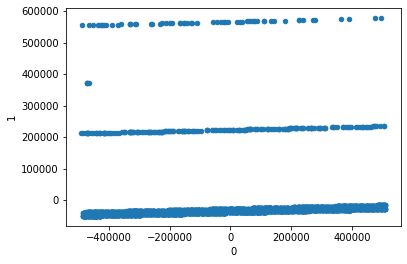

In [ ]:
pd.DataFrame(X_train_pca).plot.scatter(x=0,y=1)

O gráfico de dispersão apresenta relações lineares entre os dois componentes gerados com o PCA.

In [ ]:
clf_pca = LazyClassifier(verbose=1,ignore_warnings=False, custom_metric=None, predictions=True)
models_pca, predictions_pca = clf_pca.fit(X_train_pca, X_test_pca, y_train, y_test)

 10%|█         | 3/29 [00:00<00:02, 11.31it/s]

ROC AUC couldn't be calculated for AdaBoostClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'AdaBoostClassifier', 'Accuracy': 0.39683734939759036, 'Balanced Accuracy': 0.2389274879112004, 'ROC AUC': None, 'F1 Score': 0.28490146981302794, 'Time taken': 0.19271492958068848}
ROC AUC couldn't be calculated for BaggingClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'BaggingClassifier', 'Accuracy': 0.7228915662650602, 'Balanced Accuracy': 0.5612954462830118, 'ROC AUC': None, 'F1 Score': 0.715094095403083, 'Time taken': 0.08637547492980957}
ROC AUC couldn't be calculated for BernoulliNB
multi_class must be in ('ovo', 'ovr')
{'Model': 'BernoulliNB', 'Accuracy': 0.42620481927710846, 'Balanced Accuracy': 0.25675057208237984, 'ROC AUC': None, 'F1 Score': 0.32421981673975, 'Time taken': 0.0162813663482666}


 17%|█▋        | 5/29 [00:00<00:03,  6.50it/s]

ROC AUC couldn't be calculated for CalibratedClassifierCV
multi_class must be in ('ovo', 'ovr')
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.5707831325301205, 'Balanced Accuracy': 0.34524886877828054, 'ROC AUC': None, 'F1 Score': 0.4547415044852916, 'Time taken': 0.4228823184967041}
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
ROC AUC couldn't be calculated for DecisionTreeClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.7266566265060241, 'Balanced Accuracy': 0.6137086644878227, 'ROC AUC': None, 'F1 Score': 0.7251501486259976, 'Time taken': 0.026848554611206055}
ROC AUC couldn't be calculated for DummyClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'DummyClassifier', 'Accuracy': 0.28012048192771083, 'Balanced Accuracy': 0.187294272280525, 'ROC AUC': None, 'F1 Score': 0.2762093909851362, 'Time taken': 0.014649391174316406}
ROC AUC couldn't be calculated for ExtraTreeClass

 31%|███       | 9/29 [00:01<00:02,  8.42it/s]

ROC AUC couldn't be calculated for ExtraTreesClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.7914156626506024, 'Balanced Accuracy': 0.6558985428688319, 'ROC AUC': None, 'F1 Score': 0.7865550112488101, 'Time taken': 0.31957507133483887}
ROC AUC couldn't be calculated for GaussianNB
multi_class must be in ('ovo', 'ovr')
{'Model': 'GaussianNB', 'Accuracy': 0.40963855421686746, 'Balanced Accuracy': 0.26707260299264607, 'ROC AUC': None, 'F1 Score': 0.3827359184555523, 'Time taken': 0.02252507209777832}
ROC AUC couldn't be calculated for KNeighborsClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.5835843373493976, 'Balanced Accuracy': 0.418358656759145, 'ROC AUC': None, 'F1 Score': 0.5681475569732444, 'Time taken': 0.0571439266204834}


 41%|████▏     | 12/29 [00:01<00:02,  7.25it/s]

ROC AUC couldn't be calculated for LabelPropagation
multi_class must be in ('ovo', 'ovr')
{'Model': 'LabelPropagation', 'Accuracy': 0.4269578313253012, 'Balanced Accuracy': 0.25722894685069947, 'ROC AUC': None, 'F1 Score': 0.32645054068935714, 'Time taken': 0.42357397079467773}


 52%|█████▏    | 15/29 [00:02<00:02,  6.56it/s]

ROC AUC couldn't be calculated for LabelSpreading
multi_class must be in ('ovo', 'ovr')
{'Model': 'LabelSpreading', 'Accuracy': 0.4269578313253012, 'Balanced Accuracy': 0.25721859241848477, 'ROC AUC': None, 'F1 Score': 0.3258542547636429, 'Time taken': 0.5161609649658203}
ROC AUC couldn't be calculated for LinearDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.42620481927710846, 'Balanced Accuracy': 0.25675057208237984, 'ROC AUC': None, 'F1 Score': 0.32421981673975, 'Time taken': 0.026919841766357422}
ROC AUC couldn't be calculated for LinearSVC
multi_class must be in ('ovo', 'ovr')
{'Model': 'LinearSVC', 'Accuracy': 0.5707831325301205, 'Balanced Accuracy': 0.34524886877828054, 'ROC AUC': None, 'F1 Score': 0.4547415044852916, 'Time taken': 0.07602763175964355}


 59%|█████▊    | 17/29 [00:02<00:01,  7.80it/s]

ROC AUC couldn't be calculated for LogisticRegression
multi_class must be in ('ovo', 'ovr')
{'Model': 'LogisticRegression', 'Accuracy': 0.5707831325301205, 'Balanced Accuracy': 0.34524886877828054, 'ROC AUC': None, 'F1 Score': 0.4547415044852916, 'Time taken': 0.12891745567321777}
ROC AUC couldn't be calculated for NearestCentroid
multi_class must be in ('ovo', 'ovr')
{'Model': 'NearestCentroid', 'Accuracy': 0.19201807228915663, 'Balanced Accuracy': 0.290382441086992, 'ROC AUC': None, 'F1 Score': 0.2307217575109451, 'Time taken': 0.01581287384033203}
NuSVC model failed to execute
specified nu is infeasible
ROC AUC couldn't be calculated for PassiveAggressiveClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.4036144578313253, 'Balanced Accuracy': 0.259716245499282, 'ROC AUC': None, 'F1 Score': 0.3784109204513266, 'Time taken': 0.024474382400512695}
ROC AUC couldn't be calculated for Perceptron
multi_class must be in ('ovo', 'ovr')
{'M

 76%|███████▌  | 22/29 [00:02<00:00,  8.17it/s]

ROC AUC couldn't be calculated for RandomForestClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'RandomForestClassifier', 'Accuracy': 0.7198795180722891, 'Balanced Accuracy': 0.5589070991527714, 'ROC AUC': None, 'F1 Score': 0.7088494013419183, 'Time taken': 0.5070171356201172}
ROC AUC couldn't be calculated for RidgeClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'RidgeClassifier', 'Accuracy': 0.42620481927710846, 'Balanced Accuracy': 0.25675057208237984, 'ROC AUC': None, 'F1 Score': 0.32421981673975, 'Time taken': 0.02104926109313965}
ROC AUC couldn't be calculated for RidgeClassifierCV
multi_class must be in ('ovo', 'ovr')
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.42620481927710846, 'Balanced Accuracy': 0.25675057208237984, 'ROC AUC': None, 'F1 Score': 0.32421981673975, 'Time taken': 0.018622159957885742}
ROC AUC couldn't be calculated for SGDClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'SGDClassifier', 'Accuracy': 0.5504518072289156, 'Balanced A

 90%|████████▉ | 26/29 [00:03<00:00,  8.07it/s]

ROC AUC couldn't be calculated for SVC
multi_class must be in ('ovo', 'ovr')
{'Model': 'SVC', 'Accuracy': 0.5707831325301205, 'Balanced Accuracy': 0.34524886877828054, 'ROC AUC': None, 'F1 Score': 0.4547415044852916, 'Time taken': 0.4249417781829834}
StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 97%|█████████▋| 28/29 [00:04<00:00,  6.21it/s]

ROC AUC couldn't be calculated for XGBClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'XGBClassifier', 'Accuracy': 0.6852409638554217, 'Balanced Accuracy': 0.49777775268795876, 'ROC AUC': None, 'F1 Score': 0.6631347640477483, 'Time taken': 0.5967209339141846}


100%|██████████| 29/29 [00:04<00:00,  6.38it/s]

ROC AUC couldn't be calculated for LGBMClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'LGBMClassifier', 'Accuracy': 0.5881024096385542, 'Balanced Accuracy': 0.42346313098972266, 'ROC AUC': None, 'F1 Score': 0.5596530924957953, 'Time taken': 0.4685821533203125}


In [ ]:
models_pca

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.66,0.80,None,0.63,0.02
ExtraTreesClassifier,0.79,0.66,None,0.79,0.32
ExtraTreeClassifier,0.76,0.65,None,0.75,0.02
DecisionTreeClassifier,0.73,0.61,None,0.73,0.03
BaggingClassifier,0.72,0.56,None,0.72,0.09
RandomForestClassifier,0.72,0.56,None,0.71,0.51
XGBClassifier,0.69,0.50,None,0.66,0.60
LGBMClassifier,0.59,0.42,None,0.56,0.47
KNeighborsClassifier,0.58,0.42,None,0.57,0.06


### resultado

In [ ]:
models_pca.mean()

Accuracy            0.53
Balanced Accuracy   0.39
ROC AUC              NaN
F1 Score            0.47
Time Taken          0.17
dtype: float64

A redução da dimensionalidade PCA para dois componentes reduziu o desempenho dos modelos para um acurácia balanceada média de 39% (-40%) e F1 de 47% (-45%).

In [ ]:
for col in predictions_pca.columns:
  print(col)
  print(classification_report(y_test, predictions_pca[col]))

AdaBoostClassifier
              precision    recall  f1-score   support

           1       0.35      0.99      0.52       442
           2       0.00      0.00      0.00       308
           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00       101
           5       0.94      0.21      0.34       437

    accuracy                           0.40      1328
   macro avg       0.26      0.24      0.17      1328
weighted avg       0.43      0.40      0.28      1328

BaggingClassifier
              precision    recall  f1-score   support

           1       0.72      0.73      0.72       442
           2       0.70      0.65      0.68       308
           3       0.47      0.17      0.25        40
           4       0.37      0.35      0.36       101
           5       0.82      0.90      0.86       437

    accuracy                           0.72      1328
   macro avg       0.61      0.56      0.57      1328
weighted avg       0.71      0.72      0

In [ ]:
kpca_2 = KernelPCA(n_components=2)
kpca_2.fit(X_train)
X_train_kpca, X_test_kpca = kpca_2.transform(X_train), kpca_2.transform(X_test)

In [ ]:
clf_kpca = LazyClassifier(verbose=1,ignore_warnings=False, custom_metric=None, predictions=True)
models_kpca, predictions_kpca = clf_kpca.fit(X_train_kpca, X_test_kpca, y_train, y_test)

 10%|█         | 3/29 [00:00<00:02, 10.06it/s]

ROC AUC couldn't be calculated for AdaBoostClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'AdaBoostClassifier', 'Accuracy': 0.39683734939759036, 'Balanced Accuracy': 0.2389274879112004, 'ROC AUC': None, 'F1 Score': 0.28490146981302794, 'Time taken': 0.23151159286499023}
ROC AUC couldn't be calculated for BaggingClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'BaggingClassifier', 'Accuracy': 0.7228915662650602, 'Balanced Accuracy': 0.5612954462830118, 'ROC AUC': None, 'F1 Score': 0.715094095403083, 'Time taken': 0.09025859832763672}
ROC AUC couldn't be calculated for BernoulliNB
multi_class must be in ('ovo', 'ovr')
{'Model': 'BernoulliNB', 'Accuracy': 0.42620481927710846, 'Balanced Accuracy': 0.25675057208237984, 'ROC AUC': None, 'F1 Score': 0.32421981673975, 'Time taken': 0.014878273010253906}


 17%|█▋        | 5/29 [00:00<00:03,  7.58it/s]

ROC AUC couldn't be calculated for CalibratedClassifierCV
multi_class must be in ('ovo', 'ovr')
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.5707831325301205, 'Balanced Accuracy': 0.34524886877828054, 'ROC AUC': None, 'F1 Score': 0.4547415044852916, 'Time taken': 0.3147919178009033}
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
ROC AUC couldn't be calculated for DecisionTreeClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.7266566265060241, 'Balanced Accuracy': 0.6137086644878227, 'ROC AUC': None, 'F1 Score': 0.7251501486259976, 'Time taken': 0.02816462516784668}
ROC AUC couldn't be calculated for DummyClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'DummyClassifier', 'Accuracy': 0.28012048192771083, 'Balanced Accuracy': 0.187294272280525, 'ROC AUC': None, 'F1 Score': 0.2762093909851362, 'Time taken': 0.020864486694335938}
ROC AUC couldn't be calculated for ExtraTreeClassi

 31%|███       | 9/29 [00:01<00:02,  8.94it/s]

ROC AUC couldn't be calculated for ExtraTreesClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.7914156626506024, 'Balanced Accuracy': 0.6558985428688319, 'ROC AUC': None, 'F1 Score': 0.7865550112488101, 'Time taken': 0.32285141944885254}
ROC AUC couldn't be calculated for GaussianNB
multi_class must be in ('ovo', 'ovr')
{'Model': 'GaussianNB', 'Accuracy': 0.40963855421686746, 'Balanced Accuracy': 0.26707260299264607, 'ROC AUC': None, 'F1 Score': 0.3827359184555523, 'Time taken': 0.015950679779052734}
ROC AUC couldn't be calculated for KNeighborsClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.5835843373493976, 'Balanced Accuracy': 0.418358656759145, 'ROC AUC': None, 'F1 Score': 0.5681475569732444, 'Time taken': 0.05690145492553711}


 41%|████▏     | 12/29 [00:01<00:02,  7.47it/s]

ROC AUC couldn't be calculated for LabelPropagation
multi_class must be in ('ovo', 'ovr')
{'Model': 'LabelPropagation', 'Accuracy': 0.4269578313253012, 'Balanced Accuracy': 0.25722894685069947, 'ROC AUC': None, 'F1 Score': 0.32645054068935714, 'Time taken': 0.42823266983032227}


 52%|█████▏    | 15/29 [00:02<00:02,  6.58it/s]

ROC AUC couldn't be calculated for LabelSpreading
multi_class must be in ('ovo', 'ovr')
{'Model': 'LabelSpreading', 'Accuracy': 0.4269578313253012, 'Balanced Accuracy': 0.25721859241848477, 'ROC AUC': None, 'F1 Score': 0.3258542547636429, 'Time taken': 0.5305819511413574}
ROC AUC couldn't be calculated for LinearDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.42620481927710846, 'Balanced Accuracy': 0.25675057208237984, 'ROC AUC': None, 'F1 Score': 0.32421981673975, 'Time taken': 0.027615785598754883}
ROC AUC couldn't be calculated for LinearSVC
multi_class must be in ('ovo', 'ovr')
{'Model': 'LinearSVC', 'Accuracy': 0.5707831325301205, 'Balanced Accuracy': 0.34524886877828054, 'ROC AUC': None, 'F1 Score': 0.4547415044852916, 'Time taken': 0.07793426513671875}


 59%|█████▊    | 17/29 [00:02<00:01,  7.94it/s]

ROC AUC couldn't be calculated for LogisticRegression
multi_class must be in ('ovo', 'ovr')
{'Model': 'LogisticRegression', 'Accuracy': 0.5707831325301205, 'Balanced Accuracy': 0.34524886877828054, 'ROC AUC': None, 'F1 Score': 0.4547415044852916, 'Time taken': 0.11732935905456543}
ROC AUC couldn't be calculated for NearestCentroid
multi_class must be in ('ovo', 'ovr')
{'Model': 'NearestCentroid', 'Accuracy': 0.19201807228915663, 'Balanced Accuracy': 0.290382441086992, 'ROC AUC': None, 'F1 Score': 0.2307217575109451, 'Time taken': 0.01545095443725586}
NuSVC model failed to execute
specified nu is infeasible
ROC AUC couldn't be calculated for PassiveAggressiveClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.4036144578313253, 'Balanced Accuracy': 0.259716245499282, 'ROC AUC': None, 'F1 Score': 0.3784109204513266, 'Time taken': 0.025031328201293945}
ROC AUC couldn't be calculated for Perceptron
multi_class must be in ('ovo', 'ovr')
{'M

 76%|███████▌  | 22/29 [00:02<00:00,  8.25it/s]

ROC AUC couldn't be calculated for RandomForestClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'RandomForestClassifier', 'Accuracy': 0.7198795180722891, 'Balanced Accuracy': 0.5589070991527714, 'ROC AUC': None, 'F1 Score': 0.7088494013419183, 'Time taken': 0.506610631942749}
ROC AUC couldn't be calculated for RidgeClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'RidgeClassifier', 'Accuracy': 0.42620481927710846, 'Balanced Accuracy': 0.25675057208237984, 'ROC AUC': None, 'F1 Score': 0.32421981673975, 'Time taken': 0.018735647201538086}
ROC AUC couldn't be calculated for RidgeClassifierCV
multi_class must be in ('ovo', 'ovr')
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.42620481927710846, 'Balanced Accuracy': 0.25675057208237984, 'ROC AUC': None, 'F1 Score': 0.32421981673975, 'Time taken': 0.01718449592590332}
ROC AUC couldn't be calculated for SGDClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'SGDClassifier', 'Accuracy': 0.5504518072289156, 'Balanced Ac

 90%|████████▉ | 26/29 [00:03<00:00,  8.04it/s]

ROC AUC couldn't be calculated for SVC
multi_class must be in ('ovo', 'ovr')
{'Model': 'SVC', 'Accuracy': 0.5707831325301205, 'Balanced Accuracy': 0.34524886877828054, 'ROC AUC': None, 'F1 Score': 0.4547415044852916, 'Time taken': 0.442842960357666}
StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 97%|█████████▋| 28/29 [00:04<00:00,  6.25it/s]

ROC AUC couldn't be calculated for XGBClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'XGBClassifier', 'Accuracy': 0.6852409638554217, 'Balanced Accuracy': 0.49777775268795876, 'ROC AUC': None, 'F1 Score': 0.6631347640477483, 'Time taken': 0.5861399173736572}


100%|██████████| 29/29 [00:04<00:00,  6.44it/s]

ROC AUC couldn't be calculated for LGBMClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'LGBMClassifier', 'Accuracy': 0.5881024096385542, 'Balanced Accuracy': 0.42346313098972266, 'ROC AUC': None, 'F1 Score': 0.5596530924957953, 'Time taken': 0.4798929691314697}


In [ ]:
models_kpca.mean()

Accuracy            0.53
Balanced Accuracy   0.39
ROC AUC              NaN
F1 Score            0.47
Time Taken          0.17
dtype: float64

A redução da dimensionalidade KPCA para dois componentes reduziu o desempenho dos modelos para um acurácia balanceada média de 39% (-40%) e F1 de 47% (-45%).

# Treinamento com balanceamento de dados

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
#import mlrose

Uso da técnica Synthetic Minority Over-sampling (SMOTE) para equilibrar as classes

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN

In [ ]:
pd.Series(y_train).value_counts()

5    933
1    923
2    593
4    175
3     72
Name: classe, dtype: int64

In [ ]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [ ]:
pd.Series(y_resampled).value_counts()

4    1370
1    1370
5    1370
2    1370
3    1370
dtype: int64

In [ ]:
clf_imb = LazyClassifier(verbose=1,ignore_warnings=False, custom_metric=None, predictions=True)
models_imb, predictions_imb = clf_imb.fit(X_resampled, X_test, y_resampled, y_test)

  3%|▎         | 1/29 [00:02<01:17,  2.78s/it]

ROC AUC couldn't be calculated for AdaBoostClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'AdaBoostClassifier', 'Accuracy': 0.670933734939759, 'Balanced Accuracy': 0.8, 'ROC AUC': None, 'F1 Score': 0.6189216961743688, 'Time taken': 2.778784990310669}


  7%|▋         | 2/29 [00:03<00:48,  1.80s/it]

ROC AUC couldn't be calculated for BaggingClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'BaggingClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': None, 'F1 Score': 1.0, 'Time taken': 1.1101057529449463}
ROC AUC couldn't be calculated for BernoulliNB
multi_class must be in ('ovo', 'ovr')
{'Model': 'BernoulliNB', 'Accuracy': 0.6980421686746988, 'Balanced Accuracy': 0.7697081069448525, 'ROC AUC': None, 'F1 Score': 0.6655681532777478, 'Time taken': 0.08348202705383301}


 14%|█▍        | 4/29 [00:07<00:45,  1.82s/it]

ROC AUC couldn't be calculated for CalibratedClassifierCV
multi_class must be in ('ovo', 'ovr')
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.9984939759036144, 'Balanced Accuracy': 0.9988981606628666, 'ROC AUC': None, 'F1 Score': 0.9984939759036144, 'Time taken': 3.594770669937134}
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 28%|██▊       | 8/29 [00:07<00:13,  1.56it/s]

ROC AUC couldn't be calculated for DecisionTreeClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'DecisionTreeClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': None, 'F1 Score': 1.0, 'Time taken': 0.21980047225952148}
ROC AUC couldn't be calculated for DummyClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'DummyClassifier', 'Accuracy': 0.2183734939759036, 'Balanced Accuracy': 0.20509333478807537, 'ROC AUC': None, 'F1 Score': 0.24682492835901187, 'Time taken': 0.06164717674255371}
ROC AUC couldn't be calculated for ExtraTreeClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'ExtraTreeClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': None, 'F1 Score': 1.0, 'Time taken': 0.06397199630737305}


 31%|███       | 9/29 [00:08<00:13,  1.49it/s]

ROC AUC couldn't be calculated for ExtraTreesClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'ExtraTreesClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': None, 'F1 Score': 1.0, 'Time taken': 0.779583215713501}
ROC AUC couldn't be calculated for GaussianNB
multi_class must be in ('ovo', 'ovr')
{'Model': 'GaussianNB', 'Accuracy': 0.7914156626506024, 'Balanced Accuracy': 0.8595362504045161, 'ROC AUC': None, 'F1 Score': 0.7924608274848535, 'Time taken': 0.07749128341674805}


 38%|███▊      | 11/29 [00:09<00:10,  1.72it/s]

ROC AUC couldn't be calculated for KNeighborsClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9954819277108434, 'Balanced Accuracy': 0.9966789503402775, 'ROC AUC': None, 'F1 Score': 0.9954953870285235, 'Time taken': 0.7912728786468506}


 41%|████▏     | 12/29 [00:11<00:15,  1.13it/s]

ROC AUC couldn't be calculated for LabelPropagation
multi_class must be in ('ovo', 'ovr')
{'Model': 'LabelPropagation', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': None, 'F1 Score': 1.0, 'Time taken': 1.9852864742279053}


 45%|████▍     | 13/29 [00:14<00:22,  1.39s/it]

ROC AUC couldn't be calculated for LabelSpreading
multi_class must be in ('ovo', 'ovr')
{'Model': 'LabelSpreading', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': None, 'F1 Score': 1.0, 'Time taken': 2.988546133041382}


 48%|████▊     | 14/29 [00:14<00:16,  1.12s/it]

ROC AUC couldn't be calculated for LinearDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.9668674698795181, 'Balanced Accuracy': 0.977495051724423, 'ROC AUC': None, 'F1 Score': 0.9674444610594886, 'Time taken': 0.31801462173461914}


 52%|█████▏    | 15/29 [00:15<00:14,  1.06s/it]

ROC AUC couldn't be calculated for LinearSVC
multi_class must be in ('ovo', 'ovr')
{'Model': 'LinearSVC', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': None, 'F1 Score': 1.0, 'Time taken': 0.8842535018920898}


 55%|█████▌    | 16/29 [00:16<00:13,  1.02s/it]

ROC AUC couldn't be calculated for LogisticRegression
multi_class must be in ('ovo', 'ovr')
{'Model': 'LogisticRegression', 'Accuracy': 0.9992469879518072, 'Balanced Accuracy': 0.9993506493506494, 'ROC AUC': None, 'F1 Score': 0.9992468011774257, 'Time taken': 0.9094057083129883}
ROC AUC couldn't be calculated for NearestCentroid
multi_class must be in ('ovo', 'ovr')
{'Model': 'NearestCentroid', 'Accuracy': 0.6167168674698795, 'Balanced Accuracy': 0.7230649388301831, 'ROC AUC': None, 'F1 Score': 0.6466013091033936, 'Time taken': 0.08298325538635254}


 62%|██████▏   | 18/29 [00:32<00:45,  4.13s/it]

ROC AUC couldn't be calculated for NuSVC
multi_class must be in ('ovo', 'ovr')
{'Model': 'NuSVC', 'Accuracy': 0.9329819277108434, 'Balanced Accuracy': 0.9428011750074405, 'ROC AUC': None, 'F1 Score': 0.9341988788328861, 'Time taken': 16.119065284729004}


 66%|██████▌   | 19/29 [00:33<00:32,  3.23s/it]

ROC AUC couldn't be calculated for PassiveAggressiveClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.9984939759036144, 'Balanced Accuracy': 0.9988929834467593, 'ROC AUC': None, 'F1 Score': 0.998495212560333, 'Time taken': 0.36779165267944336}


 69%|██████▉   | 20/29 [00:33<00:22,  2.47s/it]

ROC AUC couldn't be calculated for Perceptron
multi_class must be in ('ovo', 'ovr')
{'Model': 'Perceptron', 'Accuracy': 0.9969879518072289, 'Balanced Accuracy': 0.9975994593641652, 'ROC AUC': None, 'F1 Score': 0.9969889707054066, 'Time taken': 0.22233891487121582}


 72%|███████▏  | 21/29 [00:33<00:14,  1.86s/it]

ROC AUC couldn't be calculated for QuadraticDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.8350903614457831, 'Balanced Accuracy': 0.8749287415151322, 'ROC AUC': None, 'F1 Score': 0.8309764184509449, 'Time taken': 0.20359015464782715}


 79%|███████▉  | 23/29 [00:35<00:08,  1.34s/it]

ROC AUC couldn't be calculated for RandomForestClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'RandomForestClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': None, 'F1 Score': 1.0, 'Time taken': 1.7221884727478027}
ROC AUC couldn't be calculated for RidgeClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'RidgeClassifier', 'Accuracy': 0.9691265060240963, 'Balanced Accuracy': 0.9776609915861497, 'ROC AUC': None, 'F1 Score': 0.9701431647182182, 'Time taken': 0.11304306983947754}


 83%|████████▎ | 24/29 [00:35<00:05,  1.04s/it]

ROC AUC couldn't be calculated for RidgeClassifierCV
multi_class must be in ('ovo', 'ovr')
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.963855421686747, 'Balanced Accuracy': 0.9738822760225372, 'ROC AUC': None, 'F1 Score': 0.964984834049123, 'Time taken': 0.28719019889831543}


 86%|████████▌ | 25/29 [00:36<00:03,  1.19it/s]

ROC AUC couldn't be calculated for SGDClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'SGDClassifier', 'Accuracy': 0.9939759036144579, 'Balanced Accuracy': 0.9951989187283304, 'ROC AUC': None, 'F1 Score': 0.9939697791443322, 'Time taken': 0.3367183208465576}


 90%|████████▉ | 26/29 [00:38<00:03,  1.25s/it]

ROC AUC couldn't be calculated for SVC
multi_class must be in ('ovo', 'ovr')
{'Model': 'SVC', 'Accuracy': 0.9947289156626506, 'Balanced Accuracy': 0.9958379149454665, 'ROC AUC': None, 'F1 Score': 0.9947297536301619, 'Time taken': 2.2204160690307617}
StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 97%|█████████▋| 28/29 [00:45<00:02,  2.30s/it]

ROC AUC couldn't be calculated for XGBClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'XGBClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': None, 'F1 Score': 1.0, 'Time taken': 7.106602907180786}


100%|██████████| 29/29 [00:52<00:00,  1.81s/it]

ROC AUC couldn't be calculated for LGBMClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'LGBMClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': None, 'F1 Score': 1.0, 'Time taken': 6.917102813720703}


In [ ]:
models_imb

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,1.00,1.00,None,1.00,0.88
ExtraTreesClassifier,1.00,1.00,None,1.00,0.78
XGBClassifier,1.00,1.00,None,1.00,7.11
RandomForestClassifier,1.00,1.00,None,1.00,1.72
BaggingClassifier,1.00,1.00,None,1.00,1.11
LabelSpreading,1.00,1.00,None,1.00,2.99
LabelPropagation,1.00,1.00,None,1.00,1.99
LGBMClassifier,1.00,1.00,None,1.00,6.92
ExtraTreeClassifier,1.00,1.00,None,1.00,0.06


### resultado

In [ ]:
models_imb.mean()

Accuracy            0.91
Balanced Accuracy   0.93
ROC AUC              NaN
F1 Score            0.91
Time Taken          1.94
dtype: float64

O balanceamento das classes SMOTE aumentou o desempenho dos modelos para uma acurácia balanceada média de 93% (+4%) e F1 de 91% (0%).


In [ ]:
for col in predictions_imb.columns:
  print(col)
  print(classification_report(y_test, predictions_imb[col]))

AdaBoostClassifier
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       442
           2       1.00      1.00      1.00       308
           3       1.00      1.00      1.00        40
           4       0.19      1.00      0.32       101
           5       0.00      0.00      0.00       437

    accuracy                           0.67      1328
   macro avg       0.64      0.80      0.66      1328
weighted avg       0.61      0.67      0.62      1328

BaggingClassifier
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       442
           2       1.00      1.00      1.00       308
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00       101
           5       1.00      1.00      1.00       437

    accuracy                           1.00      1328
   macro avg       1.00      1.00      1.00      1328
weighted avg       1.00      1.00      1

In [ ]:
 X_resampled_2, y_resampled_2 = ADASYN(sampling_strategy='minority').fit_resample(X, y)

In [ ]:
clf_imb_2 = LazyClassifier(verbose=1,ignore_warnings=False, custom_metric=None, predictions=True)
models_imb_2, predictions_imb_2 = clf_imb_2.fit(X_resampled_2, X_test, y_resampled_2, y_test)

  3%|▎         | 1/29 [00:01<00:54,  1.94s/it]

ROC AUC couldn't be calculated for AdaBoostClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9239457831325302, 'Balanced Accuracy': 0.8, 'ROC AUC': None, 'F1 Score': 0.8898578931109051, 'Time taken': 1.9378950595855713}


  7%|▋         | 2/29 [00:02<00:34,  1.29s/it]

ROC AUC couldn't be calculated for BaggingClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'BaggingClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': None, 'F1 Score': 1.0, 'Time taken': 0.8362200260162354}
ROC AUC couldn't be calculated for BernoulliNB
multi_class must be in ('ovo', 'ovr')
{'Model': 'BernoulliNB', 'Accuracy': 0.7010542168674698, 'Balanced Accuracy': 0.798915541989307, 'ROC AUC': None, 'F1 Score': 0.6852380355490465, 'Time taken': 0.07008981704711914}


 14%|█▍        | 4/29 [00:05<00:37,  1.48s/it]

ROC AUC couldn't be calculated for CalibratedClassifierCV
multi_class must be in ('ovo', 'ovr')
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.9992469879518072, 'Balanced Accuracy': 0.9993506493506494, 'ROC AUC': None, 'F1 Score': 0.9992468011774257, 'Time taken': 3.116318464279175}
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 28%|██▊       | 8/29 [00:06<00:10,  1.92it/s]

ROC AUC couldn't be calculated for DecisionTreeClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'DecisionTreeClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': None, 'F1 Score': 1.0, 'Time taken': 0.17952299118041992}
ROC AUC couldn't be calculated for DummyClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'DummyClassifier', 'Accuracy': 0.21159638554216867, 'Balanced Accuracy': 0.2048828066402557, 'ROC AUC': None, 'F1 Score': 0.22993006425441975, 'Time taken': 0.05172467231750488}
ROC AUC couldn't be calculated for ExtraTreeClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'ExtraTreeClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': None, 'F1 Score': 1.0, 'Time taken': 0.05294179916381836}


 31%|███       | 9/29 [00:06<00:10,  1.86it/s]

ROC AUC couldn't be calculated for ExtraTreesClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'ExtraTreesClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': None, 'F1 Score': 1.0, 'Time taken': 0.596259593963623}
ROC AUC couldn't be calculated for GaussianNB
multi_class must be in ('ovo', 'ovr')
{'Model': 'GaussianNB', 'Accuracy': 0.7966867469879518, 'Balanced Accuracy': 0.8626564848584722, 'ROC AUC': None, 'F1 Score': 0.8001626036225541, 'Time taken': 0.06539583206176758}


 38%|███▊      | 11/29 [00:07<00:08,  2.16it/s]

ROC AUC couldn't be calculated for KNeighborsClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9932228915662651, 'Balanced Accuracy': 0.9951246223153613, 'ROC AUC': None, 'F1 Score': 0.9932888860174801, 'Time taken': 0.6285791397094727}


 41%|████▏     | 12/29 [00:08<00:11,  1.54it/s]

ROC AUC couldn't be calculated for LabelPropagation
multi_class must be in ('ovo', 'ovr')
{'Model': 'LabelPropagation', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': None, 'F1 Score': 1.0, 'Time taken': 1.3221838474273682}


 45%|████▍     | 13/29 [00:10<00:15,  1.03it/s]

ROC AUC couldn't be calculated for LabelSpreading
multi_class must be in ('ovo', 'ovr')
{'Model': 'LabelSpreading', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': None, 'F1 Score': 1.0, 'Time taken': 1.985893964767456}


 48%|████▊     | 14/29 [00:11<00:11,  1.27it/s]

ROC AUC couldn't be calculated for LinearDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.9774096385542169, 'Balanced Accuracy': 0.9834465238624615, 'ROC AUC': None, 'F1 Score': 0.9782158984083107, 'Time taken': 0.25234508514404297}


 52%|█████▏    | 15/29 [00:11<00:11,  1.27it/s]

ROC AUC couldn't be calculated for LinearSVC
multi_class must be in ('ovo', 'ovr')
{'Model': 'LinearSVC', 'Accuracy': 0.9992469879518072, 'Balanced Accuracy': 0.9993506493506494, 'ROC AUC': None, 'F1 Score': 0.9992468011774257, 'Time taken': 0.7815523147583008}


 62%|██████▏   | 18/29 [00:12<00:04,  2.22it/s]

ROC AUC couldn't be calculated for LogisticRegression
multi_class must be in ('ovo', 'ovr')
{'Model': 'LogisticRegression', 'Accuracy': 0.9992469879518072, 'Balanced Accuracy': 0.9993506493506494, 'ROC AUC': None, 'F1 Score': 0.9992468011774257, 'Time taken': 0.6606001853942871}
ROC AUC couldn't be calculated for NearestCentroid
multi_class must be in ('ovo', 'ovr')
{'Model': 'NearestCentroid', 'Accuracy': 0.6227409638554217, 'Balanced Accuracy': 0.7259543498633552, 'ROC AUC': None, 'F1 Score': 0.6543516716980387, 'Time taken': 0.07419586181640625}
NuSVC model failed to execute
specified nu is infeasible


 66%|██████▌   | 19/29 [00:13<00:04,  2.41it/s]

ROC AUC couldn't be calculated for PassiveAggressiveClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': None, 'F1 Score': 1.0, 'Time taken': 0.30152249336242676}


 72%|███████▏  | 21/29 [00:13<00:02,  3.17it/s]

ROC AUC couldn't be calculated for Perceptron
multi_class must be in ('ovo', 'ovr')
{'Model': 'Perceptron', 'Accuracy': 0.9977409638554217, 'Balanced Accuracy': 0.9938981606628665, 'ROC AUC': None, 'F1 Score': 0.9977380286177638, 'Time taken': 0.22884917259216309}
ROC AUC couldn't be calculated for QuadraticDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.9329819277108434, 'Balanced Accuracy': 0.9560669705902664, 'ROC AUC': None, 'F1 Score': 0.9334829793287454, 'Time taken': 0.17045950889587402}


 76%|███████▌  | 22/29 [00:14<00:04,  1.71it/s]

ROC AUC couldn't be calculated for RandomForestClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'RandomForestClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': None, 'F1 Score': 1.0, 'Time taken': 1.29140305519104}
ROC AUC couldn't be calculated for RidgeClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'RidgeClassifier', 'Accuracy': 0.9706325301204819, 'Balanced Accuracy': 0.9752975652722297, 'ROC AUC': None, 'F1 Score': 0.971829671642649, 'Time taken': 0.08063125610351562}


 83%|████████▎ | 24/29 [00:15<00:01,  2.55it/s]

ROC AUC couldn't be calculated for RidgeClassifierCV
multi_class must be in ('ovo', 'ovr')
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.9691265060240963, 'Balanced Accuracy': 0.9739936867574212, 'ROC AUC': None, 'F1 Score': 0.9705349250485557, 'Time taken': 0.21075057983398438}


 86%|████████▌ | 25/29 [00:15<00:01,  2.76it/s]

ROC AUC couldn't be calculated for SGDClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'SGDClassifier', 'Accuracy': 0.9939759036144579, 'Balanced Accuracy': 0.993868071357879, 'ROC AUC': None, 'F1 Score': 0.9939704763908215, 'Time taken': 0.26462817192077637}


 90%|████████▉ | 26/29 [00:16<00:02,  1.43it/s]

ROC AUC couldn't be calculated for SVC
multi_class must be in ('ovo', 'ovr')
{'Model': 'SVC', 'Accuracy': 0.990210843373494, 'Balanced Accuracy': 0.9875658994470875, 'ROC AUC': None, 'F1 Score': 0.9901809295904075, 'Time taken': 1.672408103942871}
StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 97%|█████████▋| 28/29 [00:22<00:01,  1.50s/it]

ROC AUC couldn't be calculated for XGBClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'XGBClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': None, 'F1 Score': 1.0, 'Time taken': 5.199817895889282}


100%|██████████| 29/29 [00:28<00:00,  1.02it/s]

ROC AUC couldn't be calculated for LGBMClassifier
multi_class must be in ('ovo', 'ovr')
{'Model': 'LGBMClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': None, 'F1 Score': 1.0, 'Time taken': 6.231931209564209}


In [ ]:
models_imb_2.mean()

Accuracy            0.93
Balanced Accuracy   0.93
ROC AUC              NaN
F1 Score            0.93
Time Taken          1.09
dtype: float64

O balanceamento das classes ADASYN aumentou o desempenho dos modelos para uma acurácia balanceada média de 93% (+4%) e F1 de 93% (+2%).


# Comparações

## PCA x Original

In [ ]:
(models_pca - models).sort_values(by='F1 Score', ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DummyClassifier,0.00,0.00,NaN,0.00,-0.03
QuadraticDiscriminantAnalysis,-0.17,0.08,NaN,-0.20,-0.11
ExtraTreesClassifier,-0.21,-0.34,NaN,-0.21,-0.06
ExtraTreeClassifier,-0.24,-0.33,NaN,-0.24,-0.02
DecisionTreeClassifier,-0.26,-0.37,NaN,-0.27,-0.09
BaggingClassifier,-0.27,-0.44,NaN,-0.28,-0.37
RandomForestClassifier,-0.28,-0.44,NaN,-0.29,-0.22
BernoulliNB,-0.24,-0.40,NaN,-0.31,-0.04
XGBClassifier,-0.31,-0.50,NaN,-0.33,-2.11


O modelo dummy classifier não mudou com o uso do PCA, enquanto todos demais tiveram perda de desempenho, especialmente modelos lineares.

## SMOTE x Original

In [ ]:
(models_imb - models).sort_values(by='F1 Score', ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.04,0.15,NaN,0.04,1.43
BernoulliNB,0.03,0.11,NaN,0.03,0.03
LabelPropagation,0.02,0.02,NaN,0.02,1.48
LabelSpreading,0.02,0.02,NaN,0.02,2.33
RidgeClassifierCV,0.01,0.17,NaN,0.02,0.15
RidgeClassifier,0.01,0.15,NaN,0.02,0.05
DecisionTreeClassifier,0.01,0.02,NaN,0.01,0.10
KNeighborsClassifier,0.01,0.03,NaN,0.01,-0.24
SGDClassifier,0.01,0.05,NaN,0.01,0.19


O modelo NearestCentroid foi o mais beneficiado  com o uso do SMOTE aumentando 10% no F1 score, enquanto a maioria não mudou o desempenho, e alguns modelos tiveram uma perda pequena.